In [ ]:
# 자동완성 로딩 단축
%config Completer.use_jedi = False

## 데이터 전처리
---

In [ ]:
import numpy as np
import pandas as pd
import os

# os.walk() 함수: 최상위 디렉토리부터 하위 디렉토리까지 순회하면서 디렉토리 경로와 그 디렉토리 내의 파일 리스트를 반환한다
for dirname, _, filenames in os.walk('/kaggle/input'): # 전체경로, 디렉토리, 파일이름
    for filename in filenames:
        print(os.path.join(dirname, filename)) # 절대경로(전체경로) 뒤에 파일이름을 붙인다

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

### 디렉토리와 JPEG파일명 읽어 파일의 절대경로 위치와 학습/데이터셋 여부, 해당 이미지의 label 값을 결정
**이미지 데이터 처리**
- 이미지 파일 (확장자가 .jpg인 파일)만 고른다
- gubuns에 트레인셋은 train, 테스트셋은 test으로 적어 붙여 넣는다 (인덱스 할당 위한 것)

**label 데이터 처리**
- cat, dog 분류하여 레이블 변수에 붙여넣는다

In [ ]:
paths = [] # 확장자가 '.jpg' 파일들의 절대경로가 담길 리스트
dataset_gubuns = []
label_gubuns = []

# os.walk()를 이용하여 특정 디렉토리 밑에 있는 모든 하위 디렉토리를 모두 조사.
# cat-and-dog 하위 디렉토리 밑에 jpg 확장자를 가진 파일이 모두 이미지 파일임
# cat-and-dog 밑으로 /train/, /test/ 하위 디렉토리 존재(학습, 테스트 용 이미지 파일들을 가짐)


for dirname, _, filenames in os.walk('/kaggle/input/cat-and-dog'):
    for filename in filenames:
        # 이미지 파일이 아닌 파일(확장자가 .jpg파일 X)을 걸러낸다
        if '.jpg' in filename: # 만약 이미지 파일이면 절대경로를 file_path 변수에 할당해준다
            file_path = dirname + '/' + filename
            paths.append(file_path) # 'paths' array 변수에 붙여 넣는다

            # 데이터 훈련/테스트셋 분류하기
            # 순차적으로 해당 리스트에 append하며 인덱스가 부여됨. 데이터를 정렬하는 역할도 한다
            # 파일의 절대경로에 traing_set, test_set 포함 시 데이터셋 구분을 'train', 'test'로 분류
            if '/training_set/' in file_path:
                dataset_gubuns.append('train') # 'dataset_gubuns'에 'train' 원소 추가
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test') # 'dataset_gubuns'에 'test' 원소 추가
            else: dataset_gubuns.append('N/A')

            # 데이터 label 분류하기: 파일 경로에 cats, dogs 유무에 따라 'label_gubuns' 리스트에 해당한는 원소 붙여넣기
            if 'dogs' in file_path:
                label_gubuns.append('DOG') # 'dataset_gubuns'에 'DOG' 원소 추가
            elif 'cats' in file_path:
                label_gubuns.append('CAT') # 'dataset_gubuns'에 'CAT' 원소 추가
            else: label_gubuns.append('N/A')

In [ ]:
# 잘 분류되었는지 각각의 리스트를 10개까지 출력해보기
paths[:10], dataset_gubuns[:10], label_gubuns[:10]

(['/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg'],
 ['test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test'],
 ['DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG'])

### 위에서 생성된 이미지 파일의 절대경로, 데이터셋 구분, Label 값을 DataFrame으로 생성

In [ ]:
# 데이터프레임으로 만들려면 각 시리즈의 원소 개수가 일치해야 한다.
len(paths), len(dataset_gubuns), len(label_gubuns)

(10028, 10028, 10028)

In [ ]:
# 데이터프레임으로 만들기
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path': paths, 'dataset': dataset_gubuns, 'label': label_gubuns})
print('data_df shape', data_df.shape) # 데이터프레임 사이즈 확인하기
data_df.head(10) # 처음 10개까지 출력

data_df shape (10028, 3)


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG
5,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg,test,DOG
6,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg,test,DOG
7,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg,test,DOG
8,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg,test,DOG
9,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg,test,DOG


In [ ]:
# 데이터 세트 값 분포 및 Label 값 분포를 확인한다
print(data_df['dataset'].value_counts())
print(data_df['label'].value_counts())

# train:test = 8:2, 각 클래스 수가 동일한 편

dataset
train    8005
test     2023
Name: count, dtype: int64
label
DOG    5017
CAT    5011
Name: count, dtype: int64


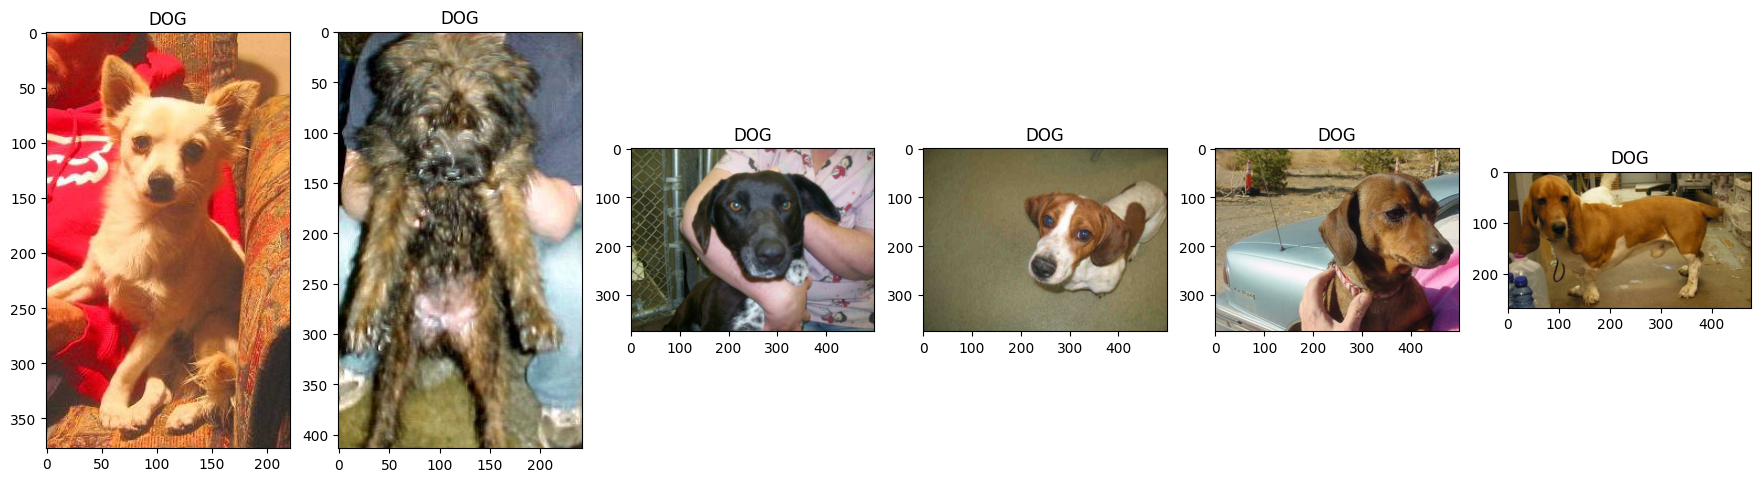

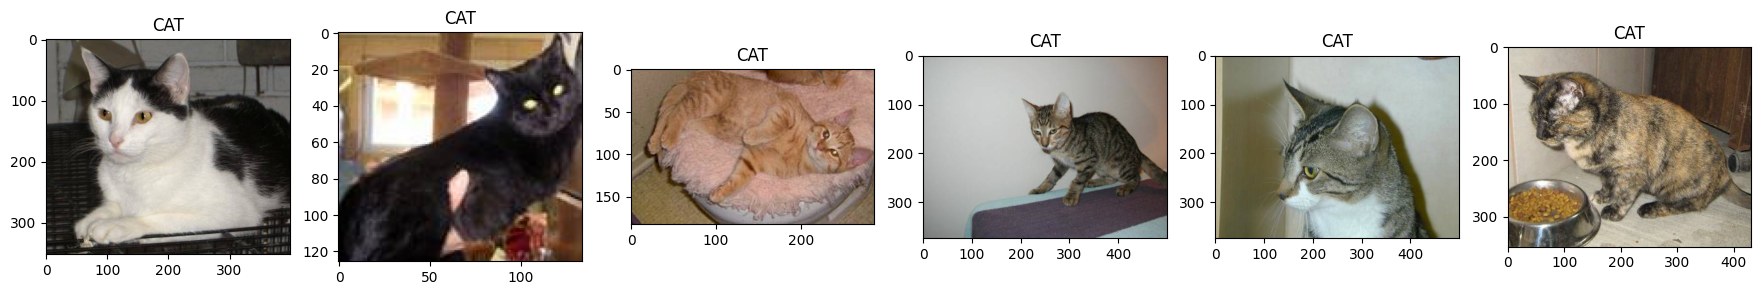

In [ ]:
# DOG와 CAT의 이미지 파일 절대 경로를 cv2.imread()로 읽어서 image array로 로드하고 이미지 시각화
# 이미지별로 서로 다른 이미지 사이즈를 가지고 있음.

import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB) # 이미지 불러오며 BGR > RGB
        axs[i].imshow(image) # 서브플롯에 이미지 그린다
        axs[i].set_title(title) # 서브플롯 제목 지정
# 'data_df' DF에서 'label' 컬럼에서 값이 DOG인 것을 찾아낸 후, 그것의 'path'컬럼의 값을 6개까지 'dog_image_list'에 리스트로 저장
dog_image_list = data_df[data_df['label']=='DOG']['path'].iloc[:6].tolist()
show_grid_images(dog_image_list, ncols=6, title='DOG')

cat_image_list = data_df[data_df['label']=='CAT']['path'].iloc[:6].tolist()
show_grid_images(cat_image_list, ncols=6, title='CAT')

In [ ]:
# 이미지 정보 확인
# dog_image_list내 이미지의 shape 확인한다 > 서로 다름
for image_path in dog_image_list: # 'dog_image_list'
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) # 경로를 이미지로 변환
    print('image shape:', image.shape) # 각각의 이미지에 대해 shape 출력

# dog_image_list의 마지막 이미지에 대해 높이, 너비, 크기 구한다
print('image height shape:', image[:,0,0].shape) # 높이
print('image height shape:', image[0,:,0].shape) # 너비
print('image height shape:', image[:,:,0].shape) # 크기

print('### image array:\n', image) # 이미지 데이터 그 자체(이미지로 변환 전 raw 데이터)


image shape: (377, 221, 3)
image shape: (414, 242, 3)
image shape: (375, 499, 3)
image shape: (375, 499, 3)
image shape: (375, 499, 3)
image shape: (267, 478, 3)
image height shape: (267,)
image height shape: (478,)
image height shape: (267, 478)
### image array:
 [[[ 81  65  31]
  [ 81  65  31]
  [ 81  65  31]
  ...
  [ 88  46  21]
  [ 85  41  14]
  [ 85  39  13]]

 [[ 81  65  31]
  [ 81  65  31]
  [ 81  65  31]
  ...
  [ 77  37  11]
  [ 79  35  10]
  [ 80  36   9]]

 [[ 81  65  31]
  [ 81  65  31]
  [ 81  65  29]
  ...
  [ 75  38  11]
  [ 79  37  12]
  [ 81  39  14]]

 ...

 [[ 94  95 100]
  [ 67  70  77]
  [ 45  49  58]
  ...
  [125  97  47]
  [126  98  48]
  [126  98  48]]

 [[ 68  73  79]
  [ 48  52  61]
  [ 32  38  50]
  ...
  [125  97  47]
  [126  98  48]
  [126  98  48]]

 [[ 49  56  64]
  [ 33  42  51]
  [ 25  33  46]
  ...
  [125  97  47]
  [125  97  47]
  [126  98  48]]]


In [ ]:
dog_image_list
image.shape, image[0].shape

((267, 478, 3), (478, 3))

### Preprocessing 과 Data Loading 메커니즘
* (초기) Keras는 Preprocessing과 Data Loading을 ImageDataGenerator 객체와 model의 fit_generator()가 상호 연결되어 수행.
* model의 fit_generator()가 인자로 ImageDataGenerator가 생성한 generator 객체를 입력 받아서 image 파일부터 Model에 array/Tensor값 입력까지 Pipeline Stream으로 이어지게 구성.
* generator 를 통해서 model에 Tensor로 공급하는 로직은 아래와 같음.
* image 파일을 image array로 로드-> preprocessing 적용(augmentation -> array 값 scale 조정(0~1사이 값) -> array 크기 resize-> Normalization 적용)
* Label값 인코딩(문자열을 단일 숫자값/원-핫 인코딩) 또한 generator기반으로 손쉽게 변경해줌.
* 실제 Preprocessing과 Data Loading은 Model에서 fit_generator()를 호출하기 전까지는 수행되지 않음.


### Preprocessing
* image file을 image array로 변환 시 0 ~ 1사이의 float형(float32)으로 변경.
* image array size를 고정 크기로 재 조정.(예를 들어 224 x 224 )
* augmentation 적용.
* Normalization(평균과 표준 편차 재 조정)
* Label값은 binary classification 이냐 multiple classification에 따라 숫자형 값 Encoding.
* multiple classification일 경우 Label Encoding을 One-hot encoding 할 지 결정.

### Data Loading
* os에 있는 image 파일을 메모리로 array 형태로 로딩.
* 이때 대량의 image 파일을 메모리로 loading 할 경우 메모리가 감당할 수 없으므로 일정 크기 단위로 array 변환. 즉 BATCH 크기 단위로 array 로딩.

### ImageDataGenerator 객체 생성
* ImageDataGenerator 객체 생성시 인자로 augmentation과 rescale에 대한 인자값을 입력하여 Preprocessing 환경 설정.

### ImageDataGenerator 객체의 flow_from_directory(), flow_from_dataframe() 호출
* 생성된 ImageDataGenerator 객체의 flow_from_directory() 메소드를 호출하여 Data Loading 환경 설정.
* flow_from_directory()는 인자로 입력된 directory에 해당하는 디렉토리에 위치한 서브 디렉토리등에서 모든 image 파일을 검색.
* 이때 바로 아래 서브 디렉토리의 이름을 Label로 인식하고, 해당 서브 디렉토리에 있는 이미지들을 해당 Label에 속하는 이미지 파일로 간주
* class_mode로 Label Encoding을 자동으로 수행.
    * class_mode='categorical' 일 경우 문자열 Label을 원-핫 인코딩
    * class_mode='sparse' 일 경우 문자열 Label을 숫자값으로 인코딩
    * class_mode='binary' 일 경우 문자열 Label을 0/1 숫자값으로 인코딩
* batch_size로 한번에 읽어올 이미지 파일 갯수 설정(즉 Batch 크기 설정).
    * 모든 이미지 파일을 한번에 Numpy Array로 변환할 경우 메모리가 부족하게 되므로 수십개 단위로 이미지 파일을 한번에 읽어옴.
* target_size로 Model에 입력하기 위해서 원본 이미지의 크기를 변경할 resize 설정.
* shuffle은 읽어온 데이터를 원래 순서대로가 아닌 섞어서 전달할지 여부

## flow_from_directory
---

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preprocessing과 Data Loading을 동시에 적용. 단 실제 Preprocessing과 Data Loading을 Model에서 fit_generator()를 호출하기 전까지는 동작하지 않음.
# augmentation은 horizontal_flip(좌우 반전)만 적용하고, 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용.

train_gen = ImageDataGenerator(horizontal_flip=True, rescale=1/255.0)

# ImageDataGenerator 객체의 flow_from_directory() 메소드를 호출.
# class_mode='categorical' 로 Label 데이터를 원-핫 인코딩, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정.
train_flow_gen = train_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/training_set/training_set' # image file이 있는 디렉토리
                                                        ,target_size=(224,224) # resize 후 이미지 크기
                                                        ,class_mode='categorical' # 문자열 lable을 자동으로 원-핫 인코딩 시켜줌
                                                        ,batch_size=64)

# 자동으로 클래스 수, 데이터셋 수가 감지된다

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 8005 images belonging to 2 classes.


### next()를 이용하여 flow_from_directory()로 반환된 Iterator 객체를 강제로 호출하여 어떤 값이 만들어 지는지 확인.

In [ ]:
# next()를 flow_from_directory()로 반환된 Iterator 객체를 강제로 호출하여 어떤 값이 만들어 지는지 확인.
# 튜플형태로 반환되고 튜플의 첫번째값은 image array, 두번째 값은 label array 임
# image array는 0~1 사이 값인 float32로 변환됨. label array는 2개 column으로 원-핫 인코딩 됨.
# next(iter(train_flow_gen))
images_array, labels_array = next(train_flow_gen)
print('-이미지 shape:', images_array.shape, '\n-label shape:', labels_array.shape)
print(images_array[:1], labels_array[:1]) # 이미지, 레이블 0번째 원소 출력

-이미지 shape: (64, 224, 224, 3) 
-label shape: (64, 2)
[[[[0.5058824  0.3372549  0.2627451 ]
   [0.47058827 0.3019608  0.227451  ]
   [0.5058824  0.3372549  0.2627451 ]
   ...
   [0.9450981  0.9803922  1.        ]
   [0.9607844  1.         1.        ]
   [0.9450981  1.         0.9921569 ]]

  [[0.5019608  0.33333334 0.25882354]
   [0.4784314  0.30980393 0.23529413]
   [0.49411768 0.3254902  0.2509804 ]
   ...
   [0.95294124 0.98823535 1.        ]
   [0.93725497 0.9960785  1.        ]
   [0.9215687  0.9843138  0.9843138 ]]

  [[0.47450984 0.30588236 0.23137257]
   [0.49411768 0.3254902  0.2509804 ]
   [0.5019608  0.33333334 0.25882354]
   ...
   [0.6784314  0.7176471  0.7254902 ]
   [0.5882353  0.6627451  0.6862745 ]
   [0.5686275  0.64705884 0.6745098 ]]

  ...

  [[0.58431375 0.5254902  0.5372549 ]
   [0.57254905 0.5137255  0.5254902 ]
   [0.54901963 0.48627454 0.49803925]
   ...
   [0.9568628  0.8941177  0.93725497]
   [0.9450981  0.8980393  0.93725497]
   [0.96470594 0.92549026 0.9607

In [ ]:
images_array = next(train_flow_gen)[0] # next() 로 호출후 반환된 리스트의 첫번째 인자 : 이미지 데이터
images_array_2 = next(train_flow_gen)[1] # next() 로 호출후 반환된 리스트의 첫번째 인자 : label 데이터
# images_array_0 = next(train_flow_gen)

print('### image array shape:', images_array.shape)
print('### label label shape:', labels_array.shape)

### image array shape: (64, 224, 224, 3)
### label label shape: (64, 2)


In [ ]:
# label array가 원-핫 인코딩 되어있는지 확인
labels_array

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

### Model 생성
- Input의 shape는 VGG, ResNet, Xception 모델이 원래 학습 이미지 사이즈로 가졌던 224 x 224 로 설정.
- 이를 위해 `flow_from_directory()`로 원본 이미지를 224 x 224 로 변환함.
- Xception 입력 이미지가 224x224일 시 최종 feature map은 7x7 (원본은 299x299 > 10x10)

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):

    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # 인자로 받은 모델명에 따라 해당하는 모델 불러온다
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')


    bm_output = base_model.output

    # classifier
    x = GlobalAveragePooling2D()(bm_output)

    if model_name != 'vgg16': # vgg16은 레이어 얕아서 Dropout X
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 개/고양이 두 종류 이므로 Dense의 Unit은 2
    output = Dense(2, activation='softmax', name='output')(x)

    # 모델 생성 부분
    model = Model(inputs=input_tensor, outputs=output)

    # 모델 요약 보여줄지 여부
    if verbose:
        model.summary()

    return model

### optimizer, loss, metric 설정
- 위에서 flow_from_directory `(class_mode='categorical')` 로 설정했기에 label은 원핫 인코딩 되어 모델로 입력됨
- 따라서 loss는 `categorical_crossentropy` 를 적용해야 함.
- 만약 위에서 `class_mode='sparse'` 라면 loss는 `sparse_categorical_crossentropy` 여야 함.
- class_mode = None 시 label 값 반환 X

In [ ]:
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

### 모델의 fit_generator()를 호출하여 학습 수행.
- `fit_generator()`는 앞에서 생성한 iterator 객체를 인자로 받아서 image array, label array를 배치 크기 만큼 순차적으로 데이터로 가져와 학습 수행.
- 입력 인자로 generator는 앞에서 생성한 `image_data_generator`를 입력
- epochs는 전체 학습 데이터를 가져와서 학습하는 횟수 의미
- steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. generator는 배치크기를 알수 있지만 전체 데이터에서 이를 batch 만큼 데이터를 몇번 가져와야 전체 데이터 학습을 수행할 지 알 수 없으므로 이를 설정해 줌. 전체 데이터 건수/배치 크기이며, 소수점 이하는 무조건 +1 로 절삭. 즉 전체 데이터 1001개 이고, 배치 크기가 10이면 steps_per_epochs는 101 임.

In [ ]:
# train 데이터 건수는 generator의 sample 속성을 이용하여 가져올 수 있다
train_image_cnt = train_flow_gen.samples
print(train_image_cnt)

# 학습 데이터 이미지 개수 : 8005개

8005


In [ ]:
# 학습시키기
# validation 데이터 설정 안한 이유 : flow_from_directory라서 validation 파일 구조 또 맞춰줘야함
model.fit(train_flow_gen, epochs=15)

Epoch 1/15
126/126 [==============================] - 127s 679ms/step - loss: 0.1479 - accuracy: 0.9423
Epoch 2/15
126/126 [==============================] - 64s 503ms/step - loss: 0.0742 - accuracy: 0.9730
Epoch 3/15
126/126 [==============================] - 64s 504ms/step - loss: 0.0440 - accuracy: 0.9829
Epoch 4/15
126/126 [==============================] - 64s 503ms/step - loss: 0.0401 - accuracy: 0.9856
Epoch 5/15
126/126 [==============================] - 64s 504ms/step - loss: 0.0665 - accuracy: 0.9759
Epoch 6/15
126/126 [==============================] - 64s 503ms/step - loss: 0.0378 - accuracy: 0.9866
Epoch 7/15
126/126 [==============================] - 64s 503ms/step - loss: 0.0323 - accuracy: 0.9889
Epoch 8/15
126/126 [==============================] - 64s 503ms/step - loss: 0.0168 - accuracy: 0.9925
Epoch 9/15
126/126 [==============================] - 64s 504ms/step - loss: 0.0184 - accuracy: 0.9930
Epoch 10/15
126/126 [==============================] - 64s 504ms/step - 

### Test 데이터로 성능 검증
Test를 위한 데이터 Generator 생성.

In [ ]:
# test data는 augmentation 적용 필요 없음
test_gen = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/test_set/test_set' # image file이 있는 디렉토리
                                             ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 리사이즈 후 사이즈
                                             ,class_mode='categorical', # 문자열 label을 자동으로 원-핫 인코딩 시켜준다
                                             batch_size=BATCH_SIZE, shuffle=False)

Found 2023 images belonging to 2 classes.


In [ ]:
# 모델의 evaluate() 호출하여 Test 데이터의 성능 측정
model.evaluate(test_flow_gen)

32/32 [==============================] - 22s 685ms/step - loss: 0.0795 - accuracy: 0.9748


[0.07946612685918808, 0.9747899174690247]

## flow_from_dataframe
---

### ImageDataGenerator 객체와 flow_from_dataframe()
* `flow_from_dataframe()`도 flow_from_directory()와 유사하게 메타 데이터 소스로 부터 **이미지 파일**과 **label**을 `numpy array`로 로드
* `flow_from_dataframe()`은 **DataFrame 메타 데이터**로부터 로드함.
* 일반적으로 `flow_from_dataframe()`이 데이터 조작 등이 더 편하기 때문에 flow_from_directory() 보다 더 애용됨.

### 메타 테이블용 DataFrame을 생성
- 3개의 컬럼으로 구성
- 이미지 파일의 `절대경로 위치`와 `데이터세트 유형`, `label값`을 가진다


In [ ]:
pd.set_option('display.max_colwidth', 200) # 컬럼 당 최대 길이가 200이 넘지 않도로 한다

data_df = pd.DataFrame({'path': paths, 'dataset':dataset_gubuns, 'label': label_gubuns}) # 이전에 데이터 처리하면서 얻은 리스트로 DF만든다

print(data_df['dataset'].value_counts()) # DF의 행 개수 출력
data_df.head() # DF의 10개 행까지 출력

dataset
train    8005
test     2023
Name: count, dtype: int64


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG


### 학습용/검증용/테스트용 DataFrame 생성

In [ ]:
data_df['dataset'] == 'train' # boolean 값 반환된다. 'dataset' 컬럼이 'train'일 경우만 True로 반환

0        False
1        False
2        False
3        False
4        False
         ...  
10023     True
10024     True
10025     True
10026     True
10027     True
Name: dataset, Length: 10028, dtype: bool

In [ ]:
train_df = data_df[data_df['dataset'] == 'train'] # 'dataset'컬럼이 'train'인 것만 선택해 새 데이터 프레임으로 만든다
test_df = data_df[data_df['dataset'] == 'test'] # 테스트용 데이터에도 동일 작업 수행

print('train_df shape :', train_df.shape, 'test_df shape :', test_df.shape )

train_df shape : (8005, 3) test_df shape : (2023, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# scikit learn의 train_test_split()을 이용하여 train용, validation용 DataFrame을 생성
# stratify를 이용하여 label 값을 균등하게 분할

tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2023)

print('tr_df shape :', tr_df.shape, 'val_df shape :', val_df.shape)
print('tr_df distribution:/n', tr_df['label'].value_counts()) # train 데이터 label 수 확인
print('val_df distribution:/n', val_df['label'].value_counts()) # valid 데이터 label 수 확인

tr_df shape : (6804, 3) val_df shape : (1201, 3)
tr_df distribution:/n label
DOG    3404
CAT    3400
Name: count, dtype: int64
val_df distribution:/n label
DOG    601
CAT    600
Name: count, dtype: int64


### 학습과 검증용 ImageDataGenerator 생성.
- **`flow_from_dataframe()`**은 인자로 dataframe = **메타 데이터용 DataFrame** 입력 받음.
- **`x_col`** : 메타 데이터용 DataFrame에서 image **파일의 절대경로 위치**를 나타내는 column명을 의미
- **y_col** :메타 데이터용 DataFrame에서 **label**값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 **문자열(object type)**이 되어야 함.
- y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.
-  softmax가 아닌 **sigmoid**로 최종 출력하므로 **class_mode='binary'** 로 Label 데이터 변환, 이미지 array는 **224 x 224** 로 변경. Batch 크기는 **64**로 설정.

In [ ]:
# IMAGE 크기와 BATCH 크기를 위한 환경 변수 설정
IMAGE_SIZE = 224
BATCH_SIZE = 64

### 학습용 ImageDataGenerator 생성과 Data generator 처리
- 학습용과 검증용 ImageDataGenerator 생성. 학습용은 augmentation + rescale적용. 검증용은 rescale만 적용
- augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용.   

In [ ]:
tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.0)


- `ImageDataGenerator` 객체의 **`flow_from_dataframe()`** 메소드를 호출.
- flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음.
- x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
- y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함.
- y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
- softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정.

In [ ]:
tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df
                                              ,x_col='path'
                                              ,y_col='label'
                                              ,target_size=(IMAGE_SIZE, IMAGE_SIZE)
                                              ,class_mode='binary' # 문자열 label을 자동으로 encoding한다
                                              ,batch_size=64
ㄹ                                              ,shuffl=True)

Found 6804 validated image filenames belonging to 2 classes.


In [ ]:
# generator의 파이프라인까지 만들어줬다면, fit() 전에 강제로 next()로 generator를 호출해서 형태를 확인하는 편이 좋다. 디버깅할 때도 좋음

images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]


print('##### image array shape', images_array.shape) # 첫번째 배치의 이미지 데이터 shape
print('##### label array shape', labels_array.shape) # 첫번째 배치의 label 데이터 shape

print('- 1st batch raw data :\n',images_array[0]) # 첫번째 배치의 0번째 이미지의 raw 데이터 출력
print('- 1st batch label[0] is : ', labels_array[0]) # 첫번쨰 배치의 0번째 label 출력

##### image array shape (64, 224, 224, 3)
##### label array shape (64,)
- 1st batch raw data :
 [[[0.227451   0.18039216 0.25882354]
  [0.21960786 0.18431373 0.2509804 ]
  [0.21176472 0.19607845 0.2509804 ]
  ...
  [0.07058824 0.07058824 0.07843138]
  [0.0627451  0.0627451  0.07058824]
  [0.05882353 0.05882353 0.06666667]]

 [[0.22352943 0.16862746 0.23529413]
  [0.21960786 0.17254902 0.227451  ]
  [0.21960786 0.18823531 0.23137257]
  ...
  [0.05882353 0.05882353 0.06666667]
  [0.05490196 0.05490196 0.0627451 ]
  [0.04705883 0.04705883 0.05490196]]

 [[0.27450982 0.19607845 0.23137257]
  [0.26666668 0.20000002 0.23137257]
  [0.2784314  0.21960786 0.2392157 ]
  ...
  [0.0509804  0.0509804  0.05882353]
  [0.04313726 0.04313726 0.0509804 ]
  [0.03921569 0.03921569 0.04705883]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.1137255  0.09019608 0.09803922]
  [0.07843138 0.05490196 0.0627451 ]
  [0.0627451  0.0

### 검증용 ImageDataGenerator 생성과 Data generator 처리

In [ ]:
# 검증용 ImageDataGenerator는 rescale만 적용.
val_generator = ImageDataGenerator(rescale=1/255.)
val_flow_gen = val_generator.flow_from_dataframe(dataframe=val_df
                                                ,x_col='path'
                                                ,y_col='label'
                                                ,target_size=(IMAGE_SIZE, IMAGE_SIZE)
                                                ,class_mode='binary'
                                                ,batch_size=64
                                                ,shuffle=False)

Found 1201 validated image filenames belonging to 2 classes.


### 모델 생성

In [ ]:
def create_model(model_name='vgg16', verbose=False):

    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    bm_output = base_model.output


    # classifier
    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 최종 output 출력을 softmax에서 sigmoid로 변환.
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)

    if verbose:
        model.summary()

    return model

In [ ]:
model = create_model(model_name='xception')

# 최종 output 출력이 softmax(다중분류) > sigmoid(이진분류) 변경됨. 그러므로 손실함수도 binary_crossentropy로 변환
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)

# 5번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

### fit() 또는 fit_generator() 호출하여 학습 수행.
* validation_data에는 앞에서 검증용으로 생성한 val_generator를 입력

In [ ]:
# 학습과 검증용 steps_per_epoch 계산
N_EPOCHS = 15

model.fit(tr_flow_gen, epochs=N_EPOCHS,
        #steps_per_epoch=int(np.ceil(tr_df.shape[0]/BATCH_SIZE)),
         validation_data=val_flow_gen,
        #validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)),
         callbacks=[rlr_cb, ely_cb])

Epoch 1/15
107/107 [==============================] - 115s 678ms/step - loss: 0.1199 - accuracy: 0.9540 - val_loss: 3.2815 - val_accuracy: 0.7960 - lr: 0.0010
Epoch 2/15
107/107 [==============================] - 59s 554ms/step - loss: 0.0634 - accuracy: 0.9759 - val_loss: 0.9546 - val_accuracy: 0.7519 - lr: 0.0010
Epoch 3/15
107/107 [==============================] - 59s 550ms/step - loss: 0.0531 - accuracy: 0.9818 - val_loss: 0.1546 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 4/15
107/107 [==============================] - 59s 548ms/step - loss: 0.0411 - accuracy: 0.9863 - val_loss: 0.2172 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 5/15
107/107 [==============================] - 59s 546ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0649 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 6/15
107/107 [==============================] - 59s 547ms/step - loss: 0.0331 - accuracy: 0.9879 - val_loss: 0.2160 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 7/15
107/107 [==============================]

### 테스트용 ImageDataGenerator 생성과 Data generator 처리 후 Evaluation 수행

In [ ]:
# test 데이터는 augmentation 적용 X
test_generator = ImageDataGenerator(rescale=1/255.0)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df
                                                ,x_col='path'
                                                ,y_col='label'
                                                ,target_size=(IMAGE_SIZE, IMAGE_SIZE)
                                                ,class_mode='binary'
                                                ,batch_size=BATCH_SIZE
                                                ,shuffle=False
                                                )

Found 2023 validated image filenames belonging to 2 classes.


In [ ]:
# evaluation으로 성능 검증
model.evaluate(test_flow_gen)

32/32 [==============================] - 17s 543ms/step - loss: 0.1023 - accuracy: 0.9773


[0.10234782844781876, 0.977261483669281]